Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fichero_peliculas = pd.read_csv("data/imdb_top_1000.csv", encoding = "latin-1")

Hacer una exploración inicial del dataframe.

In [3]:
fichero_peliculas.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
fichero_peliculas.shape

(1000, 16)

In [5]:
fichero_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
fichero_peliculas.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
#Buscamos los valores únicos de la columna certificate para entender mejor que datos guarda esta categoría, entendemos que el la categoría para la película(mayores de ...)
fichero_peliculas["Certificate"].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [8]:
fichero_peliculas["Genre"].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [9]:
fichero_peliculas["Genre"].value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

In [10]:
fichero_peliculas.duplicated().sum()

0

In [11]:
fichero_peliculas.sample()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
411,https://m.media-amazon.com/images/M/MV5BMzJiZD...,Gandhi,1982,U,191 min,"Biography, Drama, History",8.0,The life of the lawyer who became the famed le...,79.0,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi,Roshan Seth,217664,"52,767,889"


Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

- ¿En qué década salieron más películas? ¿En cuál menos? (histograma)
- ¿Cuál es la estrella principal que más aparece en la década más famosa? ¿y en la menos?
- ¿Qué película tiene la puntuación más alta de IMDB por década? ¿Y la más baja?
- ¿Cuál es la puntuación media y cuales/cuantas películas son?
- ¿Cuál es la película que ha costado más? ¿Cuál ha costado menos?

Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

In [12]:
#fichero_peliculas[fichero_peliculas["Series_Title"]=="Alien"]

In [13]:
# ¿En qué década salieron más películas? ¿En cuál menos? 

# Como veremos más abajo la década con más películas es la del 2010 y la que menos es la del 1920

In [14]:
fichero_peliculas["Released_Year"].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [15]:
fichero_peliculas["Released_Year"].value_counts()

# Observamos que los datos del año de lanzamiento están en obj. asi que lo cambiamos a int con el método Apply. Vimos que había una película solo con el valor PG
# que corresponde a la película Apollo 13 y, al ser solo un dato, decidimos buscarlo y cambiarlo en la función.

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [16]:
def año_a_int(column):
    try:
        return pd.to_numeric(column)
    except:
        return 1995

fichero_peliculas["Year"] = (fichero_peliculas["Released_Year"].apply(año_a_int))
# Ponemos diractamente 1995 porque sabemos que solo tenemos un caso donde falla que es en la película "Apolo 13", lanzada en el año 1995

In [17]:
# comprobamos que el dato de la nueva columna es int
fichero_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
 16  Year           1000 non-null   int64  
dtypes: float64(2), int64(2), object(13)
memory usage: 132

In [18]:
fichero_peliculas.sample()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year
388,https://m.media-amazon.com/images/M/MV5BMjE3ZD...,Central do Brasil,1998,R,110 min,Drama,8.0,"An emotive journey of a former school teacher,...",80.0,Walter Salles,Fernanda Montenegro,VinÃ­cius de Oliveira,MarÃ­lia PÃªra,Soia Lira,36419,"5,595,428",1998


In [19]:
# Comprobamos que la Apollo 13 ha cambiado su valor al año correspondiente.
fichero_peliculas[fichero_peliculas["Series_Title"]== "Apollo 13"]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933",1995


In [20]:
# Como tenemos muchos datos decidimos categorizar todas las películas por décadas

def decadas(column):
    if 1920 < column <= 1929:
        return 1920
    elif 1930 < column <= 1939:
        return 1930
    elif 1940 < column <= 1949:
        return 1940
    elif 1950 < column <= 1959:
        return 1950
    elif 1960 < column <= 1969:
        return 1960
    elif 1970 < column <= 1979:
        return 1970
    elif 1980 < column <= 1989:
        return 1980
    elif 1990 < column <= 1999:
        return 1990
    elif 2000 < column <= 2009:
        return 2000
    elif 2010 < column <= 2020:
        return 2010

fichero_peliculas["Decada"] = (fichero_peliculas["Year"].apply(decadas))

In [21]:
fichero_peliculas.sample()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year,Decada
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905",2003,2000.0


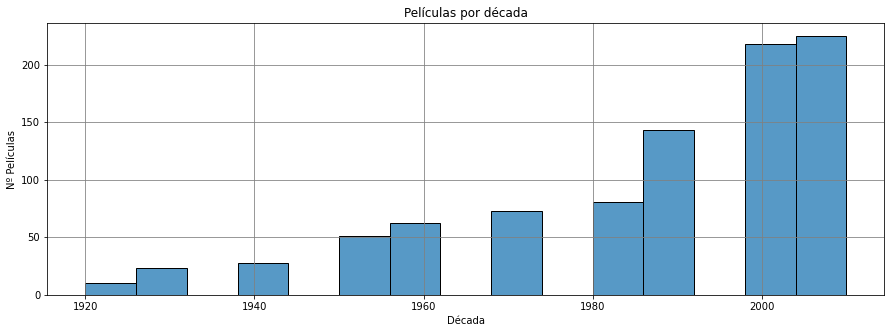

In [22]:
# Creamos una gráfica para visualizar el nº de películas por década

plt.figure(figsize=(15,5))

fig = sns.histplot(x= "Decada", data=fichero_peliculas, )

fig.set(xlabel= "Década", ylabel= "Nº Películas")

plt.grid(color="grey")

fig.set_title("Películas por década")

plt.show();

# Vemos que en la década del 2010 es la que más películas tiene, cosa que valoramos lógica por los avances tecnológicos e inversión en la industria del entretenimiento.
# Vemos que la década de 1920 es la que menos tiene, que por el argumento que acabamos de mencionar sigue teniendo lógica, ya que en los 20 eran los inicios del cine.

- ¿Cuál es la estrella principal que más aparece en la década más famosa?

In [23]:
decada_2010 = fichero_peliculas[fichero_peliculas["Decada"]== 2010]
actor2010 = pd.DataFrame(decada_2010["Star1"].value_counts()[:10].reset_index())
actor2010

,index,Star1
0,Joe Russo,4
1,Tom Hanks,3
2,Daniel Craig,3
3,Matthew McConaughey,3
4,Irrfan Khan,3
5,Akshay Kumar,3
6,Ayushmann Khurrana,3
7,Leonardo DiCaprio,3
8,Sushant Singh Rajput,3
9,Mads Mikkelsen,2


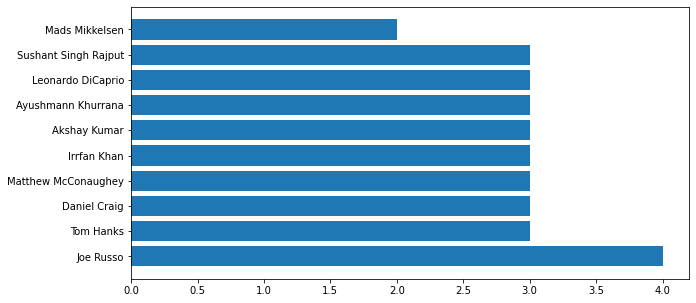

In [24]:
x = actor2010["index"]
y = actor2010["Star1"]

plt.figure(figsize=(10,5))

plt.barh( x, y)

fig.set_title("Actores con más apariciones en películas de la década 2010")

plt.show();

In [25]:
# Vemos que el "actor" con más apariciones en la década del 2010 es Joe Russo, que paradojicamente es un director de cine. Dejamos el link por si da curiosidad
# https://www.imdb.com/name/nm0751648/

- ¿Qué película tiene la puntuación más alta de MetaScore en la década más famosa? ¿Y la más baja?


In [26]:
decada_2010["Meta_score"].max()


100.0

In [27]:
decada_2010[decada_2010["Meta_score"]== 100]

# La película con más puntuación es Boyhood

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year,Decada
491,https://m.media-amazon.com/images/M/MV5BMTYzND...,Boyhood,2014,A,165 min,Drama,7.9,"The life of Mason, from early childhood to his...",100.0,Richard Linklater,Ellar Coltrane,Patricia Arquette,Ethan Hawke,Elijah Smith,335533,"25,379,975",2014,2010.0


In [28]:
decada_2010["Meta_score"].min()


40.0

In [29]:
decada_2010[decada_2010["Meta_score"]== 40]

# La película con menos puntuación es Kai po che!

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year,Decada
735,https://m.media-amazon.com/images/M/MV5BMTgwNT...,Kai po che!,2013,U,130 min,"Drama, Sport",7.7,Three friends growing up in India at the turn ...,40.0,Abhishek Kapoor,Amit Sadh,Sushant Singh Rajput,Rajkummar Rao,Amrita Puri,32628,"1,122,527",2013,2010.0


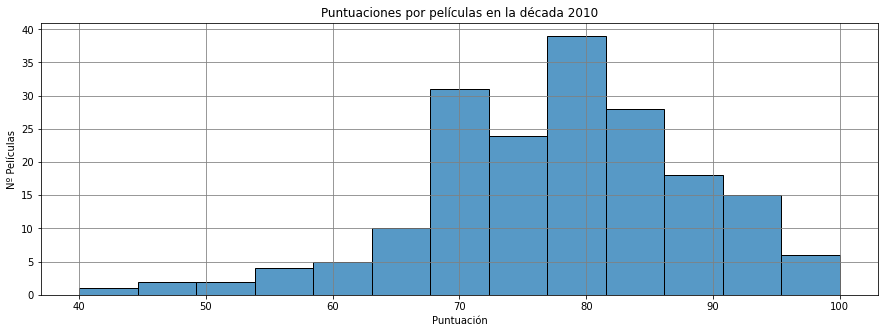

In [30]:
plt.figure(figsize=(15,5))

fig = sns.histplot(x= "Meta_score", data=decada_2010, )

fig.set(xlabel= "Puntuación", ylabel= "Nº Películas")

plt.grid(color="grey")

fig.set_title("Puntuaciones por películas en la década 2010")

plt.show();

#Sacamos un histograma de las puntuaciones para ver cuales son las puntuaciones más comunes para las películas de la década del 2010.

- ¿Cuál es la puntuación media? ¿Qué películas están en ese rango?


In [31]:
media = decada_2010["Meta_score"].mean()
media

77.90810810810811

In [32]:
rangos_puntuacion = decada_2010[(decada_2010["Meta_score"] == 77) | (decada_2010["Meta_score"] == 78)]
rangos_puntuacion

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year,Decada
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,"858,373,000",2019,2010.0
63,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,"448,139,099",2012,2010.0
84,https://m.media-amazon.com/images/M/MV5BOTdmNT...,1917,2019,R,119 min,"Drama, Thriller, War",8.3,"April 6th, 1917. As a regiment assembles to wa...",78.0,Sam Mendes,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,425844,"159,227,644",2019,2010.0
88,https://m.media-amazon.com/images/M/MV5BMTg2ND...,Jagten,2012,R,115 min,Drama,8.3,"A teacher lives a lonely life, all the while s...",77.0,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse FogelstrÃ¸m,281623,"687,185",2012,2010.0
197,https://m.media-amazon.com/images/M/MV5BZGRkOG...,Koe no katachi,2016,16,130 min,"Animation, Drama, Family",8.1,A young man is ostracized by his classmates af...,78.0,Naoko Yamada,Miyu Irino,Saori Hayami,Aoi YÃ»ki,KenshÃ´ Ono,47708,NaN,2016,2010.0
202,https://m.media-amazon.com/images/M/MV5BYzc5MT...,Logan,2017,A,137 min,"Action, Drama, Sci-Fi",8.1,"In a future where mutants are nearly extinct, ...",77.0,James Mangold,Hugh Jackman,Patrick Stewart,Dafne Keen,Boyd Holbrook,647884,"226,277,068",2017,2010.0
204,https://m.media-amazon.com/images/M/MV5BNGQzY2...,Relatos salvajes,2014,R,122 min,"Comedy, Drama, Thriller",8.1,Six short stories that explore the extremities...,77.0,DamiÃ¡n Szifron,DarÃ­o Grandinetti,MarÃ­a Marull,MÃ³nica Villa,Diego Starosta,177059,"3,107,072",2014,2010.0
330,https://m.media-amazon.com/images/M/MV5BOTMyMj...,Zootopia,2016,U,108 min,"Animation, Adventure, Comedy",8.0,"In a city of anthropomorphic animals, a rookie...",78.0,Byron Howard,Rich Moore,Jared Bush,Ginnifer Goodwin,Jason Bateman,434143,"341,268,248",2016,2010.0
468,https://m.media-amazon.com/images/M/MV5BMTQ4NT...,"I, Daniel Blake",2016,UA,100 min,Drama,7.9,"After having suffered a heart-attack, a 59-yea...",78.0,Ken Loach,Laura Obiols,Dave Johns,Hayley Squires,Sharon Percy,53818,"258,168",2016,2010.0
612,https://m.media-amazon.com/images/M/MV5BYjYzOG...,The Trial of the Chicago 7,2020,R,129 min,"Drama, History, Thriller",7.8,The story of 7 people on trial stemming from v...,77.0,Aaron Sorkin,Eddie Redmayne,Alex Sharp,Sacha Baron Cohen,Jeremy Strong,89896,NaN,2020,2010.0


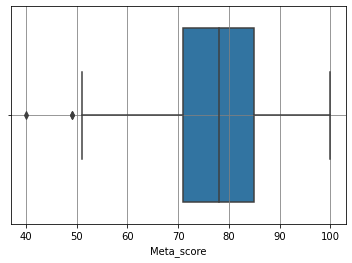

In [33]:
# Sacamos un boxplot para ver los valores estadísitcos de una forma visual.

plt.figure()

fig = sns.boxplot(x = "Meta_score", data= decada_2010)
plt.grid(color="grey")

plt.show();

- ¿Cuál es la película que ha costado más? ¿Cuál ha costado menos?

In [34]:
# Creamos un apply para convertir el presupuesto de cadena a int.

def sueldo_a_int(column):
    try:
        return int(column.replace("," , ""))
    except:
        return np.nan
   

In [35]:
decada_2010["Presupuesto"] = decada_2010["Gross"].apply(sueldo_a_int)

/var/folders/66/3gn2x5sj3tlfxjp4wp1zg9n00000gn/T/ipykernel_10832/1082498797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decada_2010["Presupuesto"] = decada_2010["Gross"].apply(sueldo_a_int)


In [36]:
decada_2010.sample()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year,Decada,Presupuesto
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,RenÃ©e Elise Goldsberry,55291,NaN,2020,2010.0,NaN


In [37]:
decada_2010["Presupuesto"].max()

936662225.0

In [38]:
pelicula_cara = decada_2010[decada_2010["Presupuesto"]== 936662225.0]
pelicula_cara

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year,Decada,Presupuesto
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,"936,662,225",2015,2010.0,936662225.0


In [39]:
decada_2010["Presupuesto"].min()

39567.0

In [40]:
pelicula_barata = decada_2010[decada_2010["Presupuesto"]== 39567.0]
pelicula_barata

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year,Decada,Presupuesto
142,https://m.media-amazon.com/images/M/MV5BNTgwOD...,Paan Singh Tomar,2012,UA,135 min,"Action, Biography, Crime",8.2,"The story of Paan Singh Tomar, an Indian athle...",NaN,Tigmanshu Dhulia,Irrfan Khan,Mahie Gill,Rajesh Abhay,Hemendra Dandotiya,33237,"39,567",2012,2010.0,39567.0


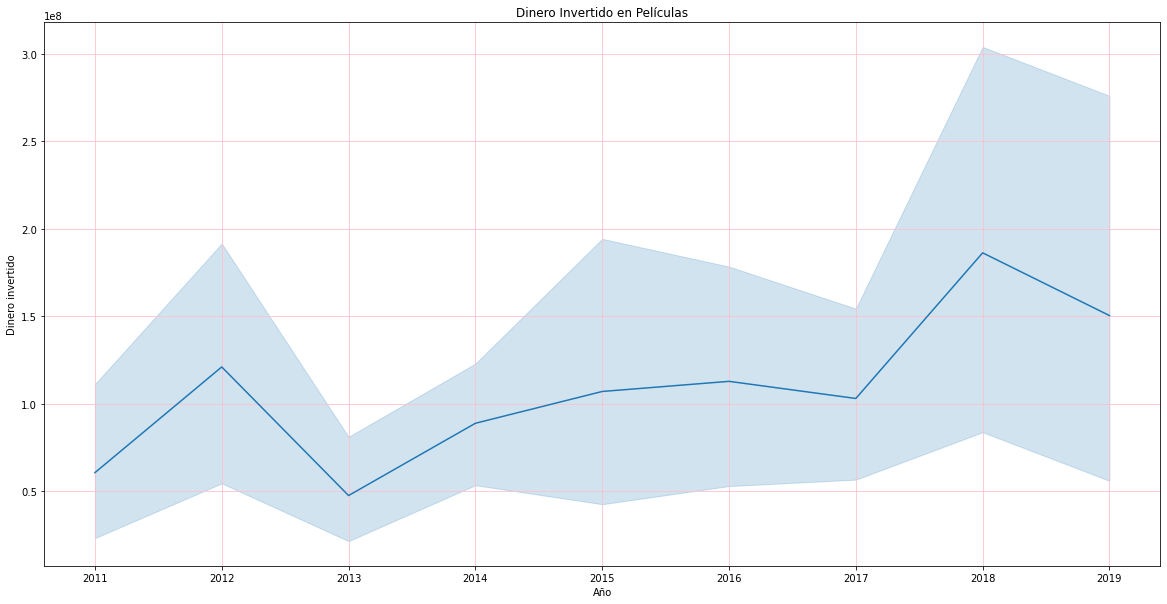

In [41]:
# Sacamos una gráfica de línea para ver las "inversiones" en películas en la década del 2010.
# Concluimos que a medida que pasa el tiempo hay un aumento en el costo de las películas, que no nos sorprende por que cada vez hay más personas que participan 
# por película, y se invierte más también en la industria del entretenimiento.

plt.figure(figsize=(20,10))

fig = sns.lineplot(x="Year", y= "Presupuesto", data= decada_2010)

fig.set(xlabel = "Año", ylabel = "Dinero invertido" )

plt.grid(color="Pink")

fig.set_title("Dinero Invertido en Películas")

plt.show();